# Projeto de Análise de Churn em uma Operadora de Telecomunicações

## Contexto

Uma operadora de telecomunicações que enfrenta um aumento significativo na taxa de cancelamento de clientes, também conhecida como **churn**. 

Para abordar esse desafio, este projeto visa analisar os dados disponíveis e identificar padrões que possam fornecer insights sobre os motivos do cancelamento. Além disso, o projeto se propõe a desenvolver estratégias de retenção com base nos resultados da análise.

## Objetivos

1. Identificar padrões e características associadas ao churn de clientes.
2. Realizar análise exploratória de dados (EDA) para compreender a distribuição e correlação entre variáveis.
3. Desenvolver estratégias de retenção com base nos insights obtidos.
4. Avaliar a viabilidade de construir um modelo de machine learning para prever o churn.

## Conjunto de Dados

 O conjunto de dados utilizado neste projeto consiste em informações de clientes da empresa, incluindo detalhes demográficos, serviços contratados, avaliações de satisfação, e a variável de destino "Churn", indicando se o cliente cancelou ou não o serviço.

# Importação das bibliotecas necessárias

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, mannwhitneyu

# Importação e visualização dos dados

In [72]:
df = pd.read_csv('telecom_churn.csv')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Verifica se há colunas com valores nulos

In [73]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Verificar se existem colunas com valores vazios

In [74]:
colunas_com_valores_vazios = df.isnull().any()

# Exibir as colunas com valores vazios, se houver
colunas_com_valores_vazios = colunas_com_valores_vazios[colunas_com_valores_vazios]
if not colunas_com_valores_vazios.empty:
    print("Colunas com valores vazios:")
    print(colunas_com_valores_vazios)
else:
    print("Não há colunas com valores vazios.")

Não há colunas com valores vazios.


# Verificar se existem valores vazios (espaços em branco) em todo o DataFrame


In [75]:
valores_vazios = df.applymap(lambda x: x.isspace() if isinstance(x, str) else False)
colunas_com_valores_vazios = valores_vazios.any()

# Exibir as colunas com valores vazios, se houver
colunas_com_valores_vazios = colunas_com_valores_vazios[colunas_com_valores_vazios]
if not colunas_com_valores_vazios.empty:
    print("Colunas com valores vazios:")
    print(colunas_com_valores_vazios)
else:
    print("Não há colunas com valores vazios.")

Colunas com valores vazios:
TotalCharges    True
dtype: bool


# Visualizar as linhas com célas da coluna "TotalCharges" vazias

In [76]:
df[df.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Tratar as células da coluna "TotalCharges" com espaços vazios

In [77]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

# Analizando os de conteúdo das colunas

In [78]:
# value count of unique variables
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())
        print('#========================= \n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
#========================= 

gender
Male      3555
Female    3488
Name: count, dtype: int64
#========================= 

Partner
No     3641
Yes    3402
Name: count, dtype: int64
#========================= 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
#========================= 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
#========================= 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
#========================= 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
#========================= 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: cou

# Analisando tipos de dados das colunas

In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

# Excluir a coluna 'customerID'


In [79]:
df = df.drop('customerID', axis=1)

# Converte a coluna 'TotalCharges' para tipo o numérico

In [80]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Visualização da distribuição de churn

In [81]:
qtd_categorias = df['Churn'].value_counts()
display(qtd_categorias)

qtd_categorias_perc = df['Churn'].value_counts(normalize=True)
display(qtd_categorias_perc)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

# Teste de Qui-Quadrado para Variáveis Categóricas:

### Realize o teste qui-quadrado para avaliar a dependência entre variáveis categóricas.


In [63]:
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {col}: p-value = {p:.4f}')

Chi-squared test for gender: p-value = 0.4866
Chi-squared test for Partner: p-value = 0.0000
Chi-squared test for Dependents: p-value = 0.0000
Chi-squared test for PhoneService: p-value = 0.3388
Chi-squared test for MultipleLines: p-value = 0.0035
Chi-squared test for InternetService: p-value = 0.0000
Chi-squared test for OnlineSecurity: p-value = 0.0000
Chi-squared test for OnlineBackup: p-value = 0.0000
Chi-squared test for DeviceProtection: p-value = 0.0000
Chi-squared test for TechSupport: p-value = 0.0000
Chi-squared test for StreamingTV: p-value = 0.0000
Chi-squared test for StreamingMovies: p-value = 0.0000
Chi-squared test for Contract: p-value = 0.0000
Chi-squared test for PaperlessBilling: p-value = 0.0000
Chi-squared test for PaymentMethod: p-value = 0.0000
Chi-squared test for Churn: p-value = 0.0000


### É possível observar que as variáveis 'gender" e "PhoneService"  obtiveram um valor acima do 0,05 ( Nível de Significância) , sinalizando uma possível **NÃO** relação entre a variavel "Churn"

# Gráfico para Análise de Churn nas variáveis "Gender" e "PhoneService"

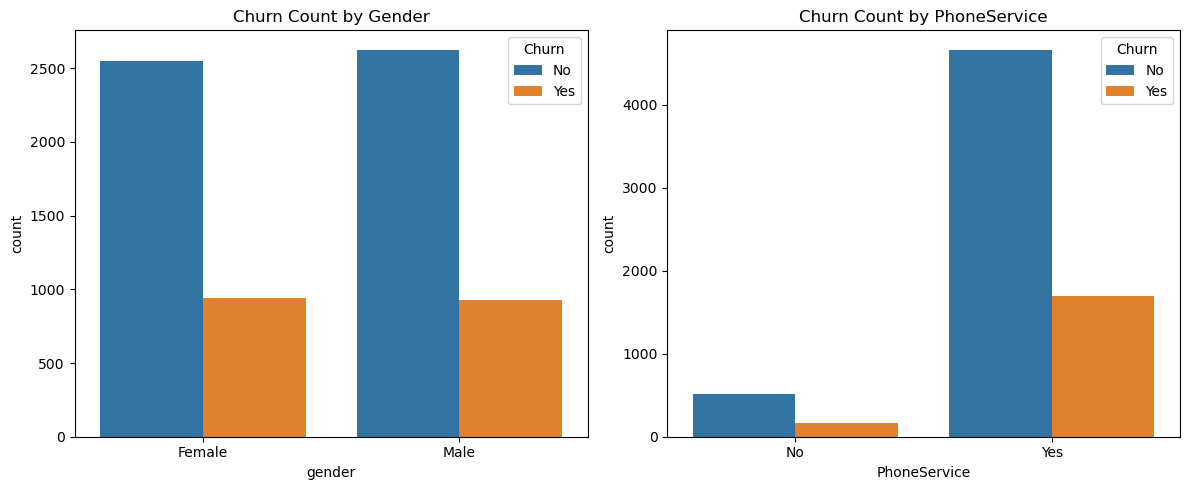

In [67]:
# Criar subplots com 1 linha e 2 colunas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfico 1: Contagem de gênero
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Churn Count by Gender')

# Gráfico 2: Contagem de PhoneService
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Churn Count by PhoneService')

# Ajustes de layout
plt.tight_layout()
plt.show()

### Nós dois gráficos podemos confirmar que estas variáveis não influenciam no Churn, pois parece ser proporcional as duas opções da categoria

# testes t e Mann-Whitney U para as variáveis numéricas

In [82]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    churn_values = df[df['Churn']=='Yes'][col]
    no_churn_values = df[df['Churn']=='No'][col]
    t_stat, p_value_t = ttest_ind(churn_values, no_churn_values)
    mwu_stat, p_value_mwu = mannwhitneyu(churn_values, no_churn_values)
    print(f'Test for {col}: t-Test p-value = {p_value_t:.4f}, Mann-Whitney U p-value = {p_value_mwu:.4f}')

Test for SeniorCitizen: t-Test p-value = 0.0000, Mann-Whitney U p-value = 0.0000
Test for tenure: t-Test p-value = 0.0000, Mann-Whitney U p-value = 0.0000
Test for MonthlyCharges: t-Test p-value = 0.0000, Mann-Whitney U p-value = 0.0000
Test for TotalCharges: t-Test p-value = 0.0000, Mann-Whitney U p-value = 0.0000


# Visualização da distribuição de 'tenure'

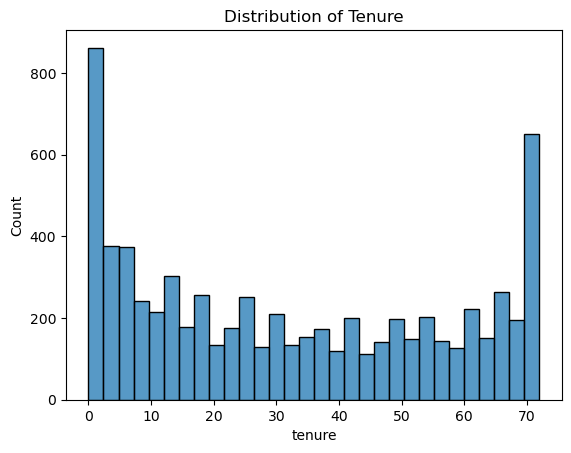

In [40]:
sns.histplot(df['tenure'], bins=30, kde=False)
plt.title('Distribution of Tenure')
plt.show()

# Visualização da distribuição de 'MonthlyCharges'

In [41]:
grafico = px.histogram(df, x='MonthlyCharges', color='Churn', nbins=30, histnorm='percent')
grafico.show()

### Há um percentual maior de churn nas faixas de 'MonthlyCharges' entre 70 e 100, diminuindo em 110 até 120.

# Contagem de serviços de internet

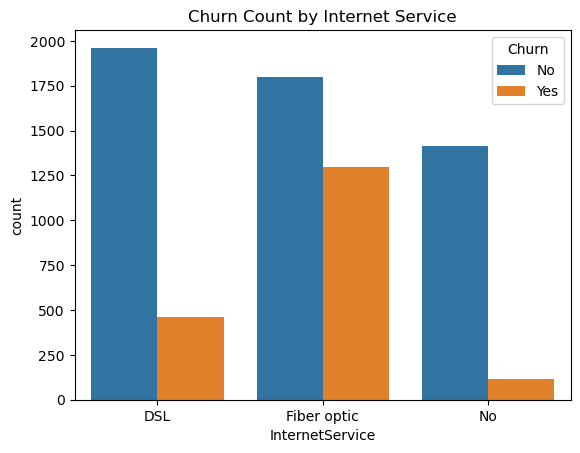

In [43]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Count by Internet Service')
plt.show()

###  'Fiber Optic' tem um percentual de churn significativamente mais alto em comparação com os outros tipos de serviço de internet.

# Contagem de contratos

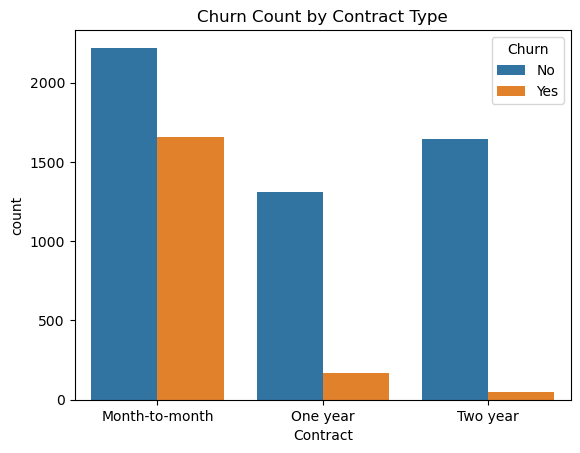

In [44]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Count by Contract Type')
plt.show()

### 'Month-to-month' tem um percentual bem mais alto de churn em comparação com os outros tipos de contrato.

# Scatter plot entre 'MonthlyCharges' e 'TotalCharges'

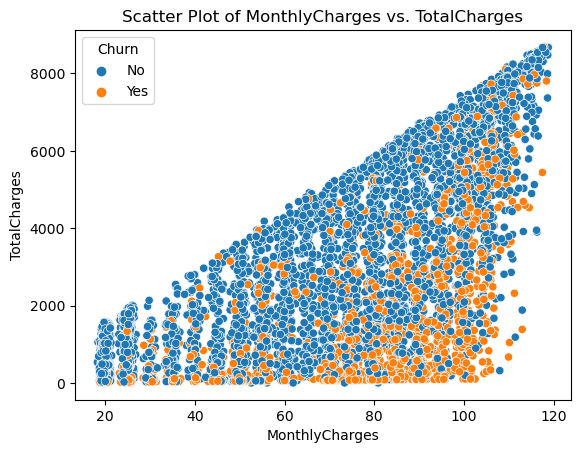

In [45]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Scatter Plot of MonthlyCharges vs. TotalCharges')
plt.show()

### Há uma concentração de churn no lado inferior direito do gráfico, indicando uma relação entre despesas mensais mais altas e menor total de gastos.

# Boxplot para 'tenure' agrupado por 'Churn'

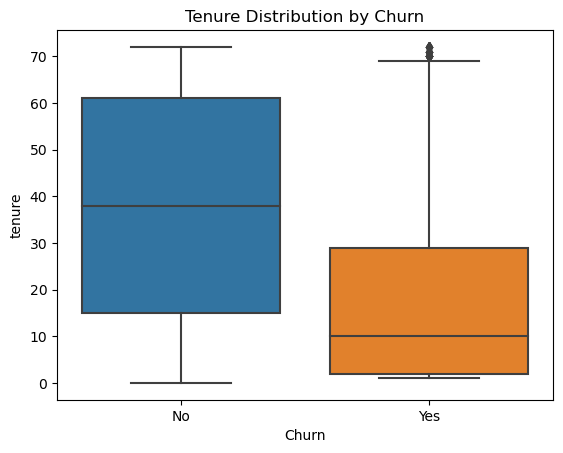

In [46]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn')
plt.show()

# Gráfico de barras empilhadas para 'Partner' e 'Dependents'

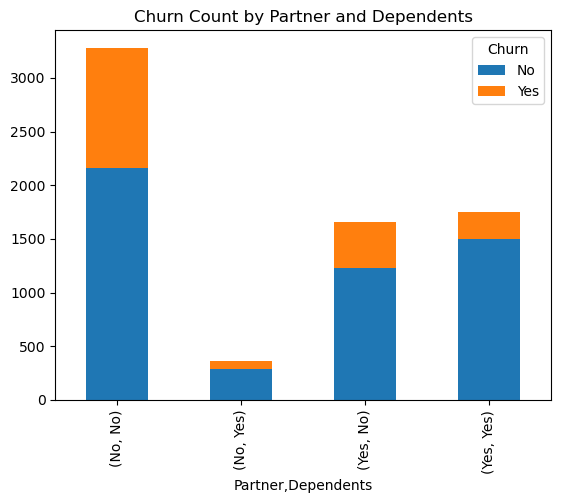

In [47]:
df_partner_dependents = df.groupby(['Partner', 'Dependents', 'Churn']).size().unstack(fill_value=0)
df_partner_dependents.plot(kind='bar', stacked=True)
plt.title('Churn Count by Partner and Dependents')
plt.show()

# Contagem de método de pagamento

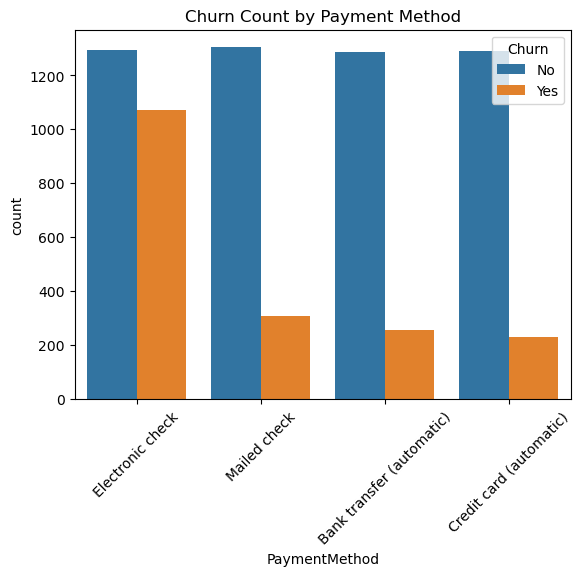

In [48]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Count by Payment Method')
plt.xticks(rotation=45)
plt.show()

### 'Electronic Check' tem um percentual de churn extremamente maior do que os outros métodos de pagamento.

# Distribuição de 'MonthlyCharges' por 'Churn'

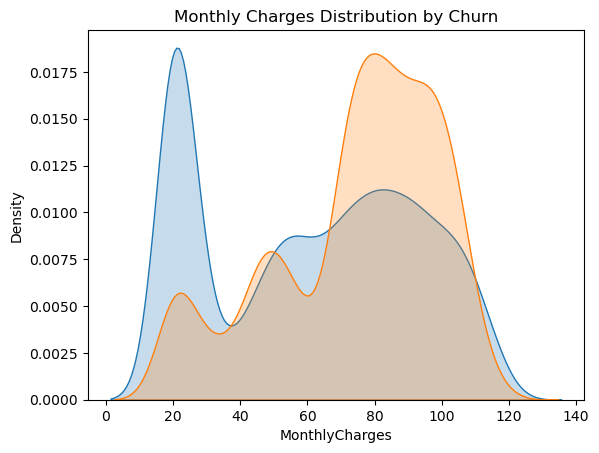

In [57]:
sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'], label='No Churn', fill=True)
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], label='Churn', fill=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

### Há um volume maior de churn no lado direito do gráfico, na faixa de 65 a 110, superando a densidade do churn em outras faixas.

# Gráfico de barras empilhadas para serviços de streaming

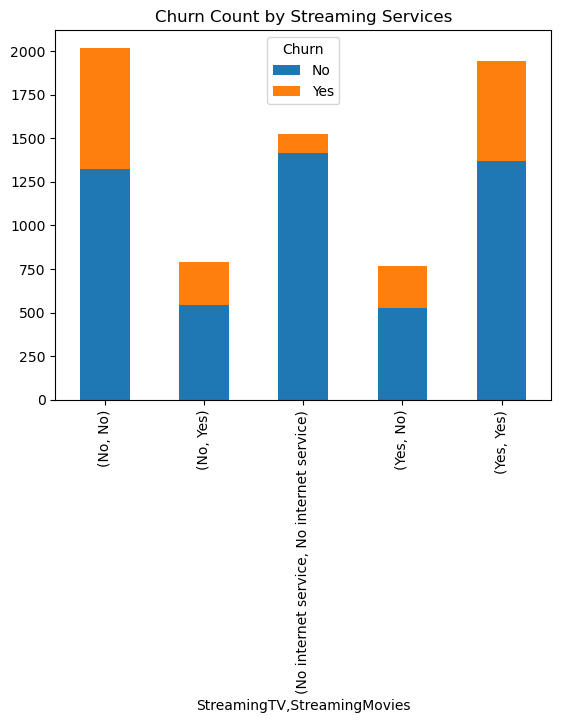

In [53]:
df_streaming = df.groupby(['StreamingTV', 'StreamingMovies', 'Churn']).size().unstack(fill_value=0)
df_streaming.plot(kind='bar', stacked=True)
plt.title('Churn Count by Streaming Services')
plt.show()

### Serviços como segurança online, streaming de TV, backup online, suporte técnico sem conexão com a Internet estão negativamente relacionados ao churn.

# Distribuição de 'TotalCharges' por 'Churn'

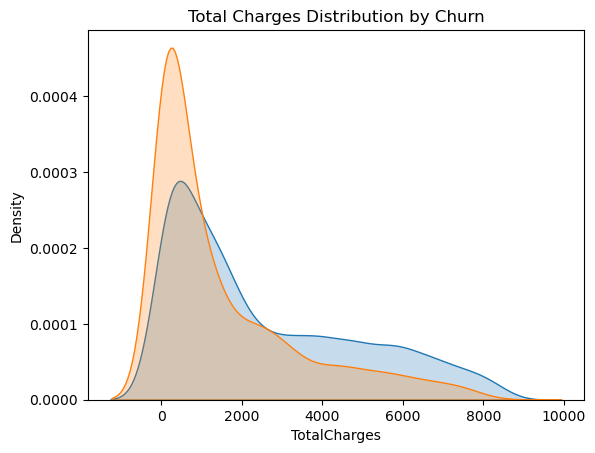

In [56]:
sns.kdeplot(df[df['Churn']=='No']['TotalCharges'].astype(float), label='No Churn', fill=True)
sns.kdeplot(df[df['Churn']=='Yes']['TotalCharges'].astype(float), label='Churn', fill=True)
plt.title('Total Charges Distribution by Churn')
plt.show()

# Scatter plot entre 'MonthlyCharges' e 'tenure' com cores representando 'Churn'

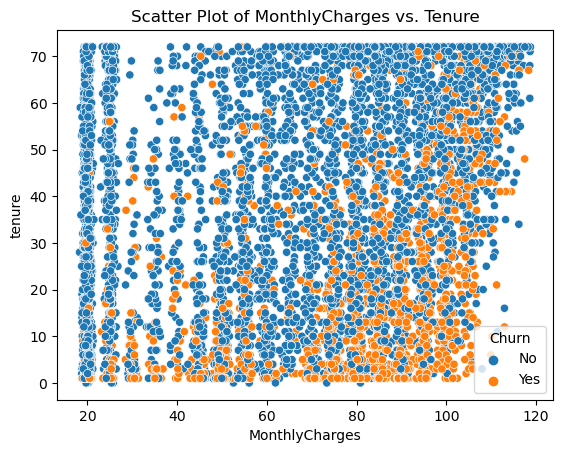

In [55]:
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df)
plt.title('Scatter Plot of MonthlyCharges vs. Tenure')
plt.show()

### Há um agrupamento maior de churn no lado inferior direito na faixa de 60 a 110

# Conclusões:

1. Clientes com contratos 'Month-to-month' e serviços de 'Fiber Optic' têm maior probabilidade de churn.
2. A forma como o pagamento é feito, especialmente com 'Electronic Check', está fortemente associada ao churn.
3. Existe uma relação entre 'MonthlyCharges', 'TotalCharges', e churn, indicando que clientes com despesas mensais mais altas podem ter maior probabilidade de churn.
4. Serviços de streaming e a combinação 'Partner'/'Dependents' também têm impacto no churn.
5. Contratos mais longos (dois anos) estão associados a uma menor rotatividade.

# Recomendações:

1. Considerar estratégias de retenção específicas para clientes com contratos 'Month-to-month' e serviços de 'Fiber Optic'.

2. Explorar opções de incentivo para alterar o método de pagamento, especialmente para reduzir o uso de 'Electronic Check'.

3. Desenvolver ofertas personalizadas para clientes com despesas mensais mais altas.

4. Avaliar melhorias nos serviços de streaming e considerar promoções para clientes sem parceiro ou dependentes.

5. Monitorar de perto clientes com contratos 'Month-to-month' e altos gastos mensais para antecipar ações de retenção.

Essas recomendações podem ajudar a reduzir a taxa de churn e melhorar a satisfação do cliente.